In [2]:
from datetime import datetime, timedelta
import pandas as pd
import time
import re
import numpy as np
import nltk
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.sentiment import SentimentIntensityAnalyzer

import matplotlib.pyplot as plt
%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


In [6]:
scanteak_df = pd.read_csv("../Clean Data/clean_consolidated_scanteak (forum).csv")
castlery_df = pd.read_csv("../Clean Data/clean_consolidated_castlery (forum).csv")
wihardja_df = pd.read_csv("../Clean Data/clean_consolidated_wihardja (forum).csv")
star_living_df = pd.read_csv("../Clean Data/clean_consolidated_starliving (forum).csv")
grey_and_sanders_df = pd.read_csv("../Clean Data/clean_consolidated_greysanders (forum).csv")
teak_furniture_df = pd.read_csv("../Clean Data/clean_consolidated_furniture (forum).csv")

### Add metadata

In [8]:
scanteak_df['query'] = scanteak_df.apply(lambda x: "scanteak", axis=1)
scanteak_df['source'] = scanteak_df.apply(lambda x: "HardwareZone", axis=1)
scanteak_df['brand'] = scanteak_df.apply(lambda x: "scanteak", axis=1)

castlery_df['query'] = castlery_df.apply(lambda x: "castlery", axis=1)
castlery_df['source'] = castlery_df.apply(lambda x: "HardwareZone", axis=1)
castlery_df['brand'] = castlery_df.apply(lambda x: "castlery", axis=1)

wihardja_df['query'] = wihardja_df.apply(lambda x: "wihardja", axis=1)
wihardja_df['source'] = wihardja_df.apply(lambda x: "HardwareZone", axis=1)
wihardja_df['brand'] = wihardja_df.apply(lambda x: "wihardja", axis=1)

star_living_df['query'] = star_living_df.apply(lambda x: "star living", axis=1)
star_living_df['source'] = star_living_df.apply(lambda x: "HardwareZone", axis=1)
star_living_df['brand'] = star_living_df.apply(lambda x: "star living", axis=1)

grey_and_sanders_df['query'] = grey_and_sanders_df.apply(lambda x: "grey and sanders", axis=1)
grey_and_sanders_df['source'] = grey_and_sanders_df.apply(lambda x: "HardwareZone", axis=1)
grey_and_sanders_df['brand'] = grey_and_sanders_df.apply(lambda x: "grey and sanders", axis=1)

teak_furniture_df['query'] = teak_furniture_df.apply(lambda x: "teak furniture", axis=1)
teak_furniture_df['source'] = teak_furniture_df.apply(lambda x: "HardwareZone", axis=1)
teak_furniture_df['brand'] = teak_furniture_df.apply(lambda x: "teak furniture", axis=1)

### EDA

#### Total Discussions

In [9]:
print(f"Total Discussion (Scanteak): {scanteak_df.shape[0]} Posts")
print(f"Total Discussion (Castlery): {castlery_df.shape[0]} Posts")
print(f"Total Discussion (Wihardja): {wihardja_df.shape[0]} Posts")
print(f"Total Discussion (Star Living): {star_living_df.shape[0]} Posts")
print(f"Total Discussion (Grey and Sanders): {grey_and_sanders_df.shape[0]} Posts")
print(f"Total Discussion (Teak Furniture): {teak_furniture_df.shape[0]} Posts")

Total Discussion (Scanteak): 109 Posts
Total Discussion (Castlery): 128 Posts
Total Discussion (Wihardja): 7 Posts
Total Discussion (Star Living): 45 Posts
Total Discussion (Grey and Sanders): 10 Posts
Total Discussion (Teak Furniture): 146 Posts


#### Bar Plot

In [ ]:
barplot_df = pd.DataFrame({'Brands': ['Scanteak',
                                     'Castlery',
                                     'wihardja',
                                     'starliving',
                                     'greysanders',
                                     'furniture'],
                          'Total Discussions': [scanteak_df.shape[0],
                                               castlery_df.shape[0],
                                               wihardja_df.shape[0],
                                               star_living_df.shape[0],
                                               grey_and_sanders_df.shape[0],
                                               teak_furniture_df.shape[0]]})

In [20]:
# Sort dataframe by total discussion
barplot_df =  barplot_df.sort_values(by ='Total Discussions')

<AxesSubplot:ylabel='Brands'>

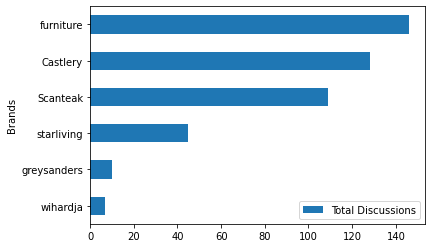

In [23]:
barplot_df.plot.barh(x='Brands')

#### Discussion by year per brands

In [29]:
scanteak_time = scanteak_df.groupby("Year")
castlery_time = castlery_df.groupby("Year")
wihardja_time = wihardja_df.groupby("Year")
star_living_time = star_living_df.groupby("Year")
grey_sander_time = grey_and_sanders_df.groupby("Year")
teak_time = teak_furniture_df.groupby("Year")

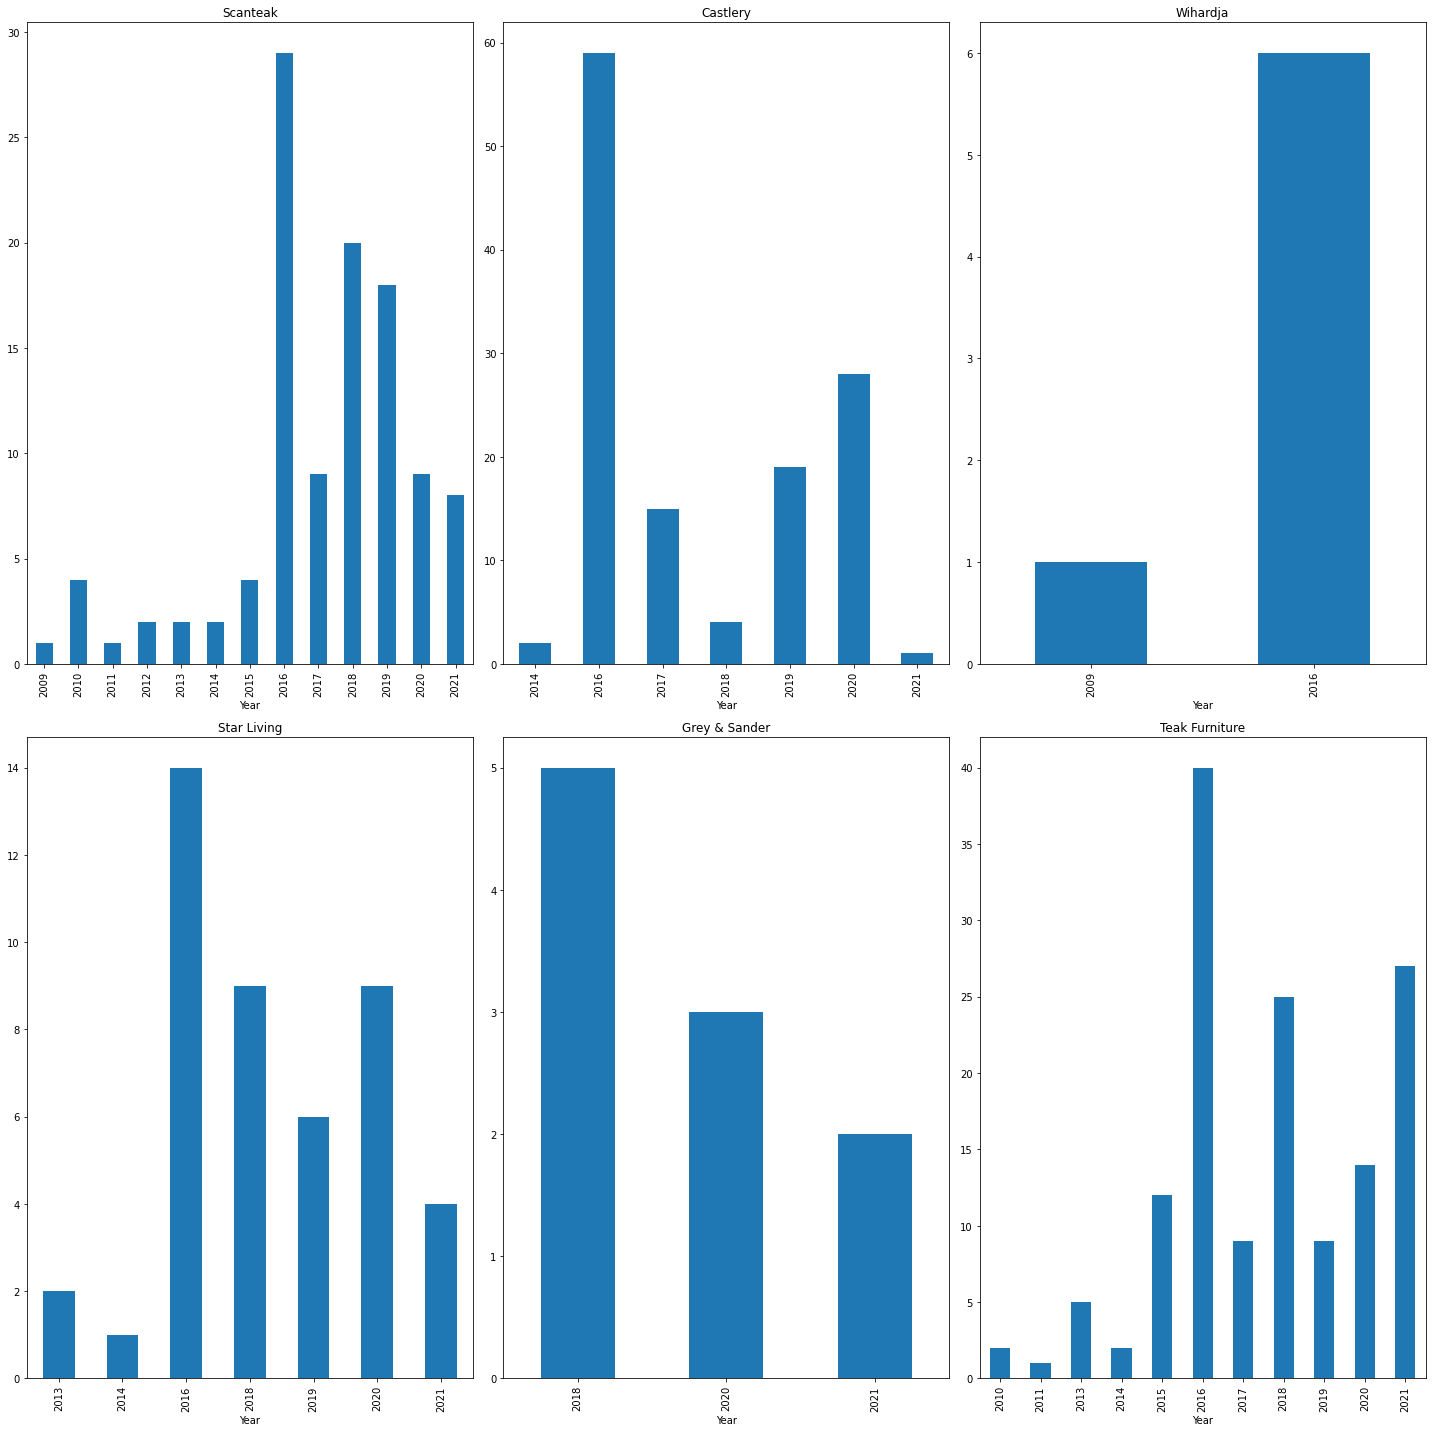

In [40]:
fig, axs = plt.subplots(2, 3, figsize=(20,20))

scanteak_time.size().plot.bar(ax = axs[0,0], title="Scanteak")
castlery_time.size().plot.bar(ax = axs[0,1], title="Castlery")
wihardja_time.size().plot.bar(ax = axs[0,2], title="Wihardja")
star_living_time.size().plot.bar(ax = axs[1,0], title="Star Living")
grey_sander_time.size().plot.bar(ax = axs[1,1], title="Grey & Sander")
teak_time.size().plot.bar(ax = axs[1,2], title="Teak Furniture")

plt.tight_layout()

In [41]:
scanteak_df


,Unnamed: 0,Author,Body,Reply to,Message Replying to,Permalink,Score,Subpage/Subreddit,TimeStamp,Year,Source,Search Term/Query,query,source,brand
0,0,sundaymorningstaple,"oh, if you are thinking how good scanteak appe...",brian_singapore,I am will shortly be moving to a work from hom...,https://forum.singaporeexpats.com/viewtopic.ph...,0.0,Forum,02/03/2021 12:51pm,2021,Singapore Expat,Scanteak,scanteak,HardwareZone,scanteak
1,1,American,courts stuff is terrible in my opinion. have a...,carismomuk,My husband and I are moving from the US to Sin...,https://forum.singaporeexpats.com/viewtopic.ph...,0.0,Forum,17/07/2015 02:22am,2015,Singapore Expat,Scanteak,scanteak,HardwareZone,scanteak
2,2,x9200,another place to take a look around is scantea...,sundaymorningstaple,"I've not been to a vhive in a long, long time....",https://forum.singaporeexpats.com/viewtopic.ph...,0.0,Forum,13/03/2014 07:21am,2014,Singapore Expat,Scanteak,scanteak,HardwareZone,scanteak
3,3,x9200,check with scantech: http://www.scanteak.com.s...,nburge,nburgeCan anyone recommend somewhere to pick u...,https://forum.singaporeexpats.com/viewtopic.ph...,0.0,Forum,02/11/2011 12:01pm,2011,Singapore Expat,Scanteak,scanteak,HardwareZone,scanteak
4,4,x9200,wooden top and metal frame sounds like not rea...,vealshank,Hi\n\nAm looking for a very simply contemporar...,https://forum.singaporeexpats.com/viewtopic.ph...,0.0,Forum,12/08/2010 08:41pm,2010,Singapore Expat,Scanteak,scanteak,HardwareZone,scanteak
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,104,Jammy_buttons,scanteak,-,-,No Link Found,4.0,singapore,14/8/2017 07:27,2017,Reddit,Scanteak,scanteak,HardwareZone,scanteak
105,105,wasteofrice,according to google maps there's a scanteak op...,-,-,No Link Found,1.0,singapore,4/5/2017 02:22,2017,Reddit,Scanteak,scanteak,HardwareZone,scanteak
106,106,Resident_Lolicon,not sure if king albert park is the right plac...,-,-,No Link Found,1.0,singapore,4/5/2017 02:11,2017,Reddit,Scanteak,scanteak,HardwareZone,scanteak
107,107,AhJibKor,scanteak is pretty successful too,-,-,No Link Found,0.0,singapore,28/10/2016 10:37,2016,Reddit,Scanteak,scanteak,HardwareZone,scanteak


#### Word Cloud

In [46]:
scanteak_message = scanteak_df["Body"].values
scanteak_text = " ".join(list(scanteak_message))

castlery_message = castlery_df["Body"].values
castlery_text = " ".join(list(castlery_message))

wihardja_message = wihardja_df["Body"].values
wihardja_text = " ".join(list(wihardja_message))

star_living_message = star_living_df["Body"].values
star_living_text = " ".join(list(star_living_message))

grey_and_sanders_message = str(grey_and_sanders_df["Body"].values)
grey_and_sanders_text = " ".join(list(grey_and_sanders_message))

teak_message = teak_furniture_df["Body"].values
teak_text = " ".join(list(teak_message))

In [48]:
stopwords = set(STOPWORDS)
stopwords.update(["scanteak", "castlery", "wihardja", "star", "living", "grey", 
                  "sanders", "mahogany", "teak", "one", "https", "Quote", "RYANISHANDSOME"])

scanteak_wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(scanteak_text)
castlery_wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(castlery_text)
wihardja_wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(wihardja_text)
star_living_wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(star_living_text)
grey_and_sanders_wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(grey_and_sanders_text)
teak_wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(teak_text)

##### Scanteak Wordcloud

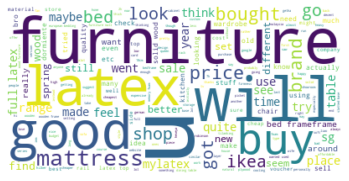

In [49]:
plt.imshow(scanteak_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### Castlery

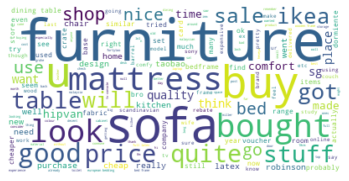

In [51]:
plt.imshow(castlery_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### Star Living 

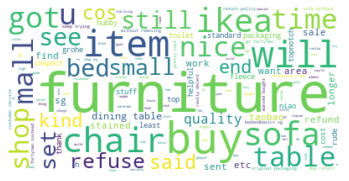

In [50]:
plt.imshow(star_living_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### Grey and Sanders

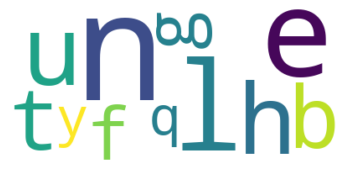

In [52]:
plt.imshow(grey_and_sanders_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### Furniture

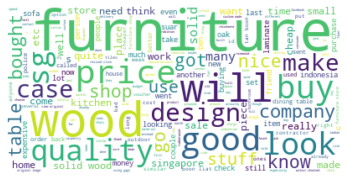

In [53]:
plt.imshow(teak_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()